**2022-04-18 `17.1-Supervise-ML - Introduction to Supervised Machine Learning`**

**Machine Learning is a mysterious topic to so many, but in reality it is nothing more than predicting outcomes based on mathematical trends.**

While even that may sound a bit intimidating, there has been so much progress made in the programs used to utilize these mathematical trends, that it is becoming less difficult to implement and interpret all the time.

ML techniques often change or update, but the basics we are going to learn in the coming weeks are going to introduce you to many of the most common methods used today.

There are a lot of links, most of them quick reads, but I promise you will be better prepared if you can glance through them before class.

Here are some resources to get a head start on the first day of ML.

* [Wikipedia - Linear Regression](https://en.wikipedia.org/wiki/Linear_regression) (this is really deep reading)
    - Wikipedia pages on other ML topics are GREAT, for more approachable learning and for their references. Consider contributing references if you see anything lacking.
* [A slightly easier read on Regression](https://www.statisticssolutions.com/what-is-linear-regression/)
* [One of the python libraries we will be using - sklearn (scikit-learn)](https://scikit-learn.org/stable/index.html)
    - [Scikit-learn flow chart](https://scikit-learn.org/stable/tutorial/machine_learning_map/)
* [r-squared definition](https://www.investopedia.com/terms/r/r-squared.asp)
* [Mean squared Error wiki](https://en.wikipedia.org/wiki/Mean_squared_error)
* [One Hot Encoding](https://medium.com/@michaeldelsole/what-is-one-hot-encoding-and-how-to-do-it-f0ae272f1179)
* [Interpreting Residual Plots](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/)
* [Linear Regression](http://cs229.stanford.edu/notes/cs229-notes1.pdf)

Some terms you want to familiarize yourself with (in addition to the above):
* [Univariate](https://www.statisticshowto.com/univariate/)
* [collinear](https://www.statisticshowto.com/collinear/)
* [Normalization and Standardization](https://www.statisticshowto.com/normalized/)

**Objectives**
* Create a machine learning environment.
* Prepare and transform data.
* Split data into training and testing sets.
* Create a model and fit the model to the data.
* Perform linear and logistic regression.
* Make predictions based on test data.

**Presentation**
* [17.1-Supervise-ML - Introduction to Supervised Machine Learning](https://ucb.bootcampcontent.com/UCB-Coding-Bootcamp/ucb-virt-data-pt-10-2021-u-b/-/blob/master/03-Lesson-Plans/17-Supervise-ML/Slideshows/Data-M_17.1-Supervise-ML.pdf)

**Install**
```
pip install sklearn

```

![](../Images/confusion_matrixes_khaled.png)

In [ ]:
# pip install sklearn

# ==========================================

### 1.01 Instructor Do: Linear Regression with scikit-learn (0:10)

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Linear Regression
* Linear regression is a fundamental algorithm in machine learning.
* It is used as a building block for other machine learning models.
* Linear regression is easy to understand, calculate, and interpret.
* Linear regression is fast!
* Often good enough. Don't over-engineer your solution. If your data is linear, use a linear model.

### **Q**: What is linear data?

In [68]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4, bias=100.0)

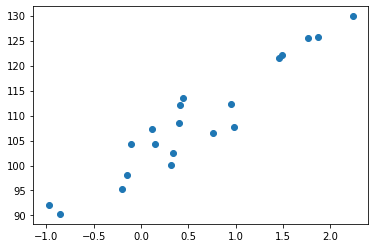

In [69]:
plt.scatter(X, y)

* We can observe from the data that we have a linear trend in our model: the response or output is directly proportional to the input.
* We can use linear regression to fit a line through the data.

![lr](01-Ins_Linear_Regression/Images/linear_regression.jpg)

* Using a trained model allows us to make predictions for the output value (home selling price) given a new input (square feet).

![pre-prices1](01-Ins_Linear_Regression/Images/predict_prices_1.png)

* New House on the Market

![pre-prices2](01-Ins_Linear_Regression/Images/predict_prices_2.png)

* We can use our linear model to predict the price of that house

![pre-prices3](01-Ins_Linear_Regression/Images/predict_prices_3.png)

### **Q**: What about nonlinear data?

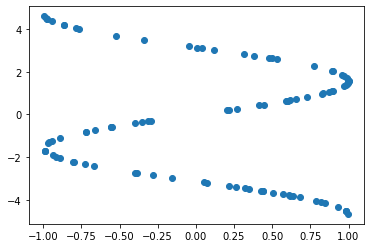

In [70]:
from sklearn.datasets import make_s_curve

data, color = make_s_curve(100, random_state=0)
plt.scatter(data[:,0], color)

![happy](01-Ins_Linear_Regression/Images/happy.gif)

## Linear Regression 

A regression line is simply calculating a line that best fits the data. This is typically done through the least squares method, where the line is chosen to have the smallest overall distance to the points.

$y = \beta_0 + \beta_1 x$

* $y$ is the output response
* $x$ is the input feature
* $\beta_0$ is the y-axis intercept
* $\beta_1$ is weight coefficient (slope)

Source: [Linear regression](https://en.wikipedia.org/wiki/Simple_linear_regression)

---
## Sklearn

The Sklearn library provides us with a linear regression model that will fit a line to our data. Sklearn follows a consistent API, where you define a model object, fit the model to the data, and then make predictions with the model.
![sklearn](01-Ins_Linear_Regression/Images/sklearn_api.png)

* First, we create the model by using the Sklearn LinearRegression model.

In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [72]:
# Next, we fit the model to our data by using the fit method.
model.fit(X, y)
print(model)

LinearRegression()


* We can view the coefficients and intercept of the line from the `coef_` and `intercept_` attributes. Note that the underscore (`_`) suffix indicates that the attribute is available after the model is fit to the data (trained).

In [75]:
print('Weight coefficients (Slope): ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients (Slope):  [12.44002424]
y-axis intercept:  101.89622505659258


Our linear model now looks like this: 

$y = 101.896225057 + 12.44002424 x$

* We can use our model to make predictions.

In [76]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 98.01970393090812
Predicted output: 100.01333771669648
Prediction Error: 1.9936337857883615


In [77]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

Predicted      Actual     Error
0   100.013338   98.019704  1.993634
1   106.874190  108.458654 -1.584464
2   114.071749  107.776544  6.295205
3    91.271253   90.315201  0.956053
4    89.738865   92.047965 -2.309101
5   105.790795  100.144726  5.646069
6   100.612180  104.371286 -3.759106
7    99.344051   95.208967  4.135085
8   106.047142  102.505262  3.541880
9   120.482605  122.119661 -1.637056
10  113.715348  112.287600  1.427748
11  103.409865  107.326140 -3.916275
12  119.987423  121.444549 -1.457126
13  125.128692  125.803460 -0.674768
14  103.688131  104.330672 -0.642542
15  107.004080  112.026181 -5.022101
16  111.363553  106.596614  4.766939
17  129.772991  129.857150 -0.084159
18  107.417894  113.512862 -6.094967
19  123.841079  125.422026 -1.580947

* We can calculate the output response for the minimum and maximum input values. Note: This will be useful later when we want to plot the fit line.

In [78]:
x_min = X.min()
x_max = X.max()

In [79]:
y_min_actual = y.min()
y_max_actual = y.max()

In [80]:
y_min = 101.896225057 + (12.44002424 * x_min)
y_max = 101.896225057 + (12.44002424 * x_max)
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 90.31520078064568
Calculated Min Value: 89.73886454212163
Actual Max Value: 129.85715020208258
Calculated Max Value: 129.7729907743173


* We can also use the predict function to calculate the predicted values. Note: The format for passing values to `model.predict()` is a list of lists.

In [81]:
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 90.31520078064568
Predicted Min Value: [89.73886454]
Actual Max Value: 129.85715020208258
Predicted Max Value: [129.77299077]


* We can show the model fit by plotting the predicted values against the original data.

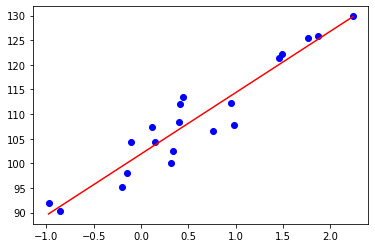

In [82]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

---
# Multiple Linear Regression
Multiple linear regression simply means that you have more than one feature variable.

For the housing price example, you may have features like this:

$Y_i$ = $Bias_0$ + $Weight_1$ sq_feet + $Weight_2$ num_bedrooms + $Weight_3$ num_bathrooms

Note: The weights are how important each feature is to the equation. This is the part that the algorithm has to learn.

The generic formula is:

$Y_i = Bias_0 + Weight_1 Feature_1 + Weight_2 Feature_2 + \ldots + Weight_p Feature_p$

The equation is often written as:

$Y_i = \theta_0 + \theta_1 X_{i1} + \theta_2 X_{i2} + \ldots + \theta_p X_{ip}$

Source: [Linear Regression](http://cs229.stanford.edu/notes/cs229-notes1.pdf)

* Generate a linear dataset with three features

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [84]:
from sklearn.datasets import make_regression

n_features = 3
X, y = make_regression(n_samples=30, n_features=n_features, 
                       n_informative=n_features, random_state=42, 
                       noise=0.5, bias=100.0)
print(X.shape)

(30, 3)


* With three or more dimensions, it becomes harder to visualize the linear trends in our data.

C:\Users\k\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


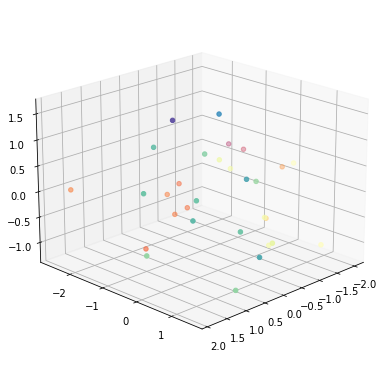

In [85]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap=plt.cm.get_cmap("Spectral"))
plt.show()

* We can still visualize three features as a 3D plot, but what about n dimensions? This becomes very difficult for the human brain to visualize. 

* We could pick just one feature from X to fit our model, but what we really want it to find is a line that best fits the data in n-dimensional space. To achieve this, linear regression can be solved by using the analytical approach called [Ordinary Least Squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) or by using the computational approach called [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) for estimating the parameters. Note that there are [tradeoffs](https://stats.stackexchange.com/questions/23128/solving-for-regression-parameters-in-closed-form-vs-gradient-descent) from using either approach. The linear regression model in Sklearn uses the Ordinary Least Squares method.

* Luckily, we can just supply our n-dimensional features, and sklearn will fit the model by using all our features.

In [87]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.9999838079561164


## Residuals

Because we can't easily plot our line in 3D space, we can use a residual plot to check our predictions.

Residuals are the difference between the true values of y and the predicted values of y.

Source: [Interpreting Residual Plots](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/)

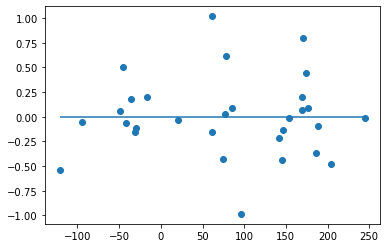

In [88]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

* We want our predictions to be close to zero on the y-axis in this plot.

# ==========================================

### 1.02 Everyone Do: Linear Regression (0:15)

# California Housing

In this activity, you'll calculate two regression lines by using a dataset of California house prices. For the first regression line, you'll explore the relationship between median income levels and median home values. For the second regression line, you'll use all the available variables to predict the median home value.

## Instructions

* For univariate regression:

    1. Load the housing data, and then separate the median income feature into one variable: `med_inc`.

    2. Create a scatter plot of `med_inc` vs. `y` (median home values) to visually find out if any linear trend exists.

    3. Use the linear regression model of Sklearn to fit the model to the data.

    4. Print the weight coefficients and the y-axis intercept for the trained model.

    5. Calculate the `y_min` and `y_max` values by using `model.predict()`.

    6. Plot the model fit line by using `[x_min[0], x_max[0]], [y_min[0], y_max[0]]`.

* For multivariate regression use the linear regression model of Sklearn to perform multiple linear regression by using all eight features for `X` and median home value for `y`.

    1. Use `train_test_split()` to create the training and testing data.
    
    2. Use the linear regression model of Sklearn to fit the model to the training data.
    
    3. Compute the R2 score for the training and the testing data separately.

    4. Plot the residuals for the training and the testing data.

- - -

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

California housing dataset
--------------------------

**Dataset characteristics:**

    :Number of instances: 20640

    :Number of attributes: eight numeric, predictive attributes and the target

    :Attribute information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing attribute values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

It can be downloaded/loaded by using the
:func:`sklearn.datasets.fetch_california_housing` function.

.. topic:: References

    - Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
      Statistics and Probability Letters, 33 (1997) 291-297

In [21]:
# Load dataset
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

* Univariate Regression: median income, `med_inc` vs. median home values, `y`.

In [22]:
med_inc = np.array([row[0] for row in X]).reshape(-1, 1)

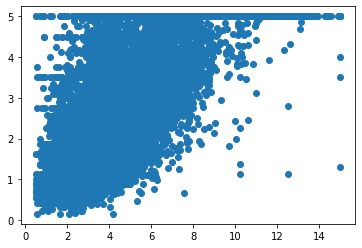

In [23]:
plt.scatter(med_inc, y)

In [24]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

### END SOLUTION

In [25]:
# Fit the model to the data. 
# Note: This is the training step, where you fit the line to the data.

### BEGIN SOLUTION

model.fit(med_inc, y)

### END SOLUTION

LinearRegression()

In [26]:
# Print the coefficient and the intercept for the model.

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [0.41793849]
y-axis intercept:  0.45085576703267827


In [27]:
# Note: We have to transform our min and max values 
# so they are in the format of array([[0.4999]]).
# This is the required format for `model.predict()`.

x_min = np.array([[med_inc.min()]])
x_max = np.array([[med_inc.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0.4999]]
Max X Value: [[15.0001]]


In [28]:
# Calculate the y_min and y_max by using model.predict and x_min and x_max.

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
### END SOLUTION

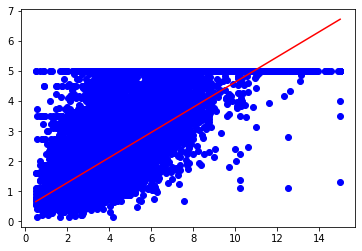

In [29]:
# Plot X and y by using plt.scatter.
# Plot the model fit line by using [x_min[0], x_max[0]], [y_min[0], y_max[0]].

### BEGIN SOLUTION
plt.scatter(med_inc, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
### END SOLUTION

* Multivariate Regression on all eight features for `X` and median home value for `y`.

In [30]:
# Use train_test_split to create training and testing data.

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [31]:
# Create the model by using LinearRegression.

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [32]:
# Fit the model to the training data, and calculate the scores for the training and testing data.

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.609873031052925
Testing Score: 0.5910509795491352


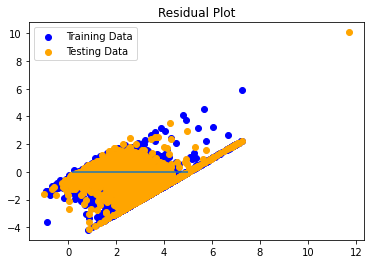

In [33]:
# Plot the residuals for the training and testing data.

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

# ==========================================

### 1.03 Instructor Do: Quantifying Regression (0:10) 

# Quantifying Linear Regression
* Create a model to quantify

In [89]:
# Import dependencies
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Generate some data
X, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4, bias=100.0)

# Create a linear model
model = LinearRegression()

# Fit (train) our model to the data
model.fit(X, y)

LinearRegression()

## Quantifying our model
* mean squared error (MSE)
* R2 Score
* There are a variety of ways to quantify the model, but MSE and R2 are very common

In [91]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with MSE and R2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

mean squared error (MSE): 11.933040779746149
R-squared (R2 ): 0.903603363418708


* A good MSE score will be close to zero, while a good [R2 score](https://en.wikipedia.org/wiki/Coefficient_of_determination) will be close to 1.
* R2 score is the default scoring for many of the Sklearn models

In [92]:
# Overall Score for the model
model.score(X, y)

0.903603363418708

## Validation

We also want to understand how well our model performs on new data. 

One approach for this is to split the data into a training and a testing dataset.

We fit (train) the model by using the training data, and we score and validate the model by using the testing data.

This train/test splitting is so common that Sklearn provides a mechanism for doing this.

## Testing and training data

To quantify our model against new input values, we often split the data into training and testing data. The model is then fit to the training data and scored by the test data. Sklearn preprocessing provides a library for automatically splitting the data into training and testing data.

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

* Train the model by using the training data

In [94]:
model.fit(X_train, y_train)

LinearRegression()

* And score the model by using the unseen testing data

In [95]:
model.score(X_test, y_test)

0.9252522435044104

# ==========================================

### 1.04 Everyone Do: Brains! (0:20)

# Brains!

In this activity, you'll calculate a regression line to predict head size vs. brain weight.

## Instructions

1. Start by creating a scatter plot of the data to visually find out if any linear trend exists.

2. Split the data into training and testing data by using the sklearn `train_test_split()` function.

3. Use the linear regression model of sklearn to fit the model to the training data.

4. Use the test data to make new predictions. Calculate the mean squared error (MSE) and the R-squared (R2) score for those predictions.

5. Use `model.score()` to calculate the R2 score for the test data.

---

# Dataset:  brain.csv

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to
to the Size of the Head", Biometrika, Vol. 4, pp105-123

Description: Brain weight (grams) and head size (cubic cm) for 237
adults classified by gender and age group.

Variables/Columns
```
GENDER: Gender  /*1=Male, 2=Female*/
AGE: Age range  /*1=20-46, 2=46+*/
SIZE: Head size (cm^3)  21-24
WEIGHT: Brain weight (grams)  29-32
```

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [97]:
# Read the CSV file into a Pandas DataFrame

brains = pd.read_csv('04-Evr_Brains/Resources/brain.csv')
brains.head()

gender  age  size  weight
0       1    1  4512    1530
1       1    1  3738    1297
2       1    1  4261    1335
3       1    1  3777    1282
4       1    1  4177    1590

In [99]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape() to create this

X = brains["weight"].values.reshape(-1, 1)
y = brains["size"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (237, 1) (237, 1)


Text(0, 0.5, 'Head Size')

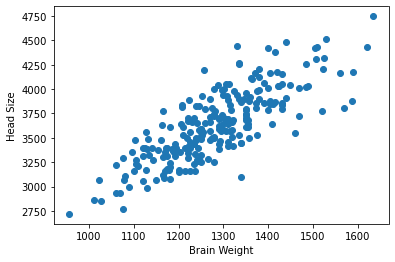

In [100]:
# Plot the data to find out if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("Brain Weight")
plt.ylabel("Head Size")
### END SOLUTION

In [101]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [102]:
# Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression

model = LinearRegression()

### END SOLUTION

In [103]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

LinearRegression()

In [104]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

### END SOLUTION

mean squared error (MSE): 51228.19330571002
R-squared (R2): 0.656808872920881


In [105]:
# Call the `score()` method on the model to show the R2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

0.656808872920881

# ==========================================

### 1.05 Instructor Do: Logistic Regression (0:15)

# Logistic Regression

Logistic regression is a statistical method for predicting binary outcomes from data.

Examples of this are "yes" vs. "no" or "young" vs. "old". 

These are categories that translate to a probability of being a 0 or a 1.

Source: [Logistic Regression](https://towardsdatascience.com/real-world-implementation-of-logistic-regression-5136cefb8125)

We can calculate the logistic regression by applying an activation function as the final step to our linear model. 

This converts the linear regression output to a probability.

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [107]:
# Generate some data
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=42)

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


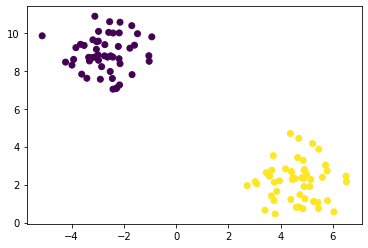

In [108]:
# Visualizing both classes
plt.scatter(X[:, 0], X[:, 1], c=y)

In [109]:
# Split our data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [110]:
# Create a logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [111]:
# Fit (train) our model by using the training data
classifier.fit(X_train, y_train)

LogisticRegression()

In [112]:
# Validate the model by using the test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0


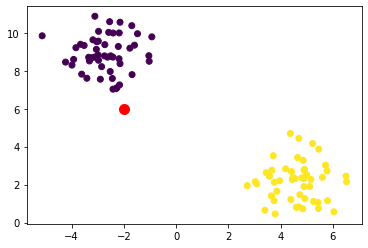

In [113]:
# Make predictions
# Generate a new data point (the red circle)
import numpy as np
new_data = np.array([[-2, 6]])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

In [114]:
# Predict the class (purple or yellow) of the new data point
predictions = classifier.predict(new_data)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {predictions}")

Classes are either 0 (purple) or 1 (yellow)
The new point was classified as: [0]


In [115]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

Prediction  Actual
0            1       1
1            1       1
2            0       0
3            0       0
4            0       0
5            1       1
6            1       1
7            0       0
8            1       1
9            1       1
10           0       0
11           0       0
12           0       0
13           0       0
14           0       0
15           0       0
16           0       0
17           1       1
18           1       1
19           0       0
20           0       0
21           1       1
22           1       1
23           0       0
24           0       0

# ==========================================

### 1.06 Students Do: Counterfeit Catcher (0:15)

# Counterfeit Catcher

In this activity, you'll apply logistic regression to predict whether a particular bank note is counterfeit or legitimate by using computed features from digitized images.

## Instructions

1. Split your data into training and testing data.

2. Create a logistic regression model with sklearn.

3. Fit the model to the training data.

4. Make 10 predictions, and then compare them to the testing data labels.

5. Compute the accuracy score for the training and the testing data separately.

---


In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

Banknote Authentication Dataset
--------------------------------------------

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

This is a copy of the UCI Machine Learning banknote authentication dataset. https://archive.ics.uci.edu/ml/datasets/banknote+authentication

In [60]:
# Read the CSV file into a Pandas DataFrame

notes = pd.read_csv('06-Stu_Counterfeit_Catcher/Resources/data_banknote_authentication.csv', header=None, names=['variance','skewness','curtosis', 'entropy', 'class'])
notes.head()

variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

In [61]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape() to create this

X = notes[['variance','skewness','curtosis', 'entropy']]
y = notes['class']

print("Shape: ", X.shape, y.shape)

Shape:  (1372, 4) (1372,)


In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [63]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [64]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [65]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.989310009718173
Testing Data Score: 0.9912536443148688


In [66]:
print(f'Actual:\t\t{list(y_test[:10])}')
print(f'Predicted:\t{list(classifier.predict(X_test[:10]))}')

Actual:		[1, 0, 1, 1, 0, 0, 0, 0, 0, 0]
Predicted:	[1, 0, 1, 1, 0, 0, 0, 0, 0, 0]


# ==========================================

### Rating Class Objectives

* rate your understanding using 1-5 method in each objective

In [ ]:
title = "17.1-Supervise-ML - Introduction to Supervised Machine Learning"
objectives = [
    "Create a machine learning environment",
    "Prepare and transform data",
    "Split data into training and testing sets",
    "Create a model and fit the model to the data",
    "Perform linear and logistic regression",
    "Make predictions based on test data",
]
rating = []
total = 0
for i in range(len(objectives)):
    rate = input(objectives[i]+"? ")
    total += int(rate)
    rating.append(objectives[i] + ". (" + rate + "/5)")
print("="*96)
print(f"Self Evaluation for: {title}")
print("-"*24)
for i in rating:
    print(i)
print("-"*64)
print("Average: " + str(total/len(objectives)))